# Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import xgboost

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, StratifiedKFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#imblearn
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced

In [3]:
df = pd.read_csv('train.csv', header = None)
df = df.set_index(df.columns[0])
# dtf = dtf.set_index("user_id")
df.head()

,1,2,3,4,5,6,7,8,9,10,...,952,953,954,955,956,957,958,959,960,961
0,,,,,,,,,,,,,,,,,,,,,
1,-1.8226,8.51070,-0.53551,-2.03440,2.2282,2.04870,-5.81380,-4.4169,2.3129,0.808290,...,-5.74060,12.5650,41.23100,-6.77570,1.72780,15.9120,23.583000,3.9158,35.7250,1
2,1.2816,-0.49410,-0.19667,1.05510,-1.9280,1.07120,-0.19667,-4.6669,3.8230,-3.245900,...,-20.50300,47.7540,2.88560,-6.86660,6.29350,-4.8789,-1.300100,-1.4275,-3.4192,1
3,-2.0304,-0.27552,-0.58236,-5.95250,7.3550,2.16640,-4.71510,17.1580,15.5120,-0.822280,...,-10.71800,-4.5436,1.38680,-5.32100,-6.08350,-1.3021,-10.569000,-4.2189,-1.6538,1
4,-1.0026,0.41320,0.62058,-0.34226,-0.2027,-0.92619,0.61123,-2.0824,-3.5442,-0.043659,...,-2.90100,4.5538,-0.77261,4.25520,0.27911,4.7744,-5.695200,-18.7410,58.3810,1
5,1.2754,25.84200,5.80000,2.89000,3.1957,4.45040,5.99760,-6.4947,2.9189,3.202700,...,-0.97276,3.8810,7.13330,0.70157,-1.69570,1.2263,-0.093752,-1.7140,2.5131,1


In [4]:
submission_test= pd.read_csv('test.csv', header=None)
submission_test = submission_test.set_index(submission_test.columns[0])
submission_test.head()

,1,2,3,4,5,6,7,8,9,10,...,951,952,953,954,955,956,957,958,959,960
0,,,,,,,,,,,,,,,,,,,,,
1,0.93652,-0.32644,2.02410,-1.996400,-2.600600,2.30860,-8.25920,-9.209900,2.88510,0.34574,...,15.2500,-0.13846,-3.11080,2.0895,2.5293,5.84900,-4.9897,4.75810,5.1081,-2.9497
2,1.93410,-2.58880,-5.27190,10.809000,-5.624800,-15.28800,18.15000,-8.198600,-25.02300,21.76300,...,-112.6000,215.56000,-169.93000,-97.7360,123.8600,-47.75700,8.5216,133.73000,-21.5210,-2.8799
3,0.15171,-0.32254,0.54372,-0.001275,-0.036333,0.01976,-0.15681,0.040158,-0.38437,0.48062,...,9.5563,2.49110,-0.79551,6.1167,1.9027,-5.27980,3.5594,0.87136,-5.3856,3.5791
4,-3.99490,-7.74780,15.75800,-5.631000,-11.692000,4.41430,-10.73100,-16.211000,0.74900,-16.25500,...,109.6000,62.72700,153.11000,-128.9800,-93.6470,224.45000,-141.1200,-135.44000,220.6000,-131.4100
5,-10.13300,-31.76300,32.31000,-12.476000,-3.226600,19.49200,-8.83500,3.977800,14.96800,-1.39250,...,1.0905,16.74200,10.98200,18.1190,-1.6926,-0.31062,2.4190,1.15070,-2.8109,9.8108


In [5]:
df.shape
df.iloc[:,960].value_counts()

3     590
9     586
6     580
8     580
2     579
10    579
1     578
5     577
4     571
7     570
13    196
12    195
20    195
16    194
19    193
17    193
14    190
18    190
11    190
15    190
21     98
27     98
24     98
26     98
28     97
23     97
22     97
29     97
25     96
30     95
33     49
40     49
38     49
37     49
31     49
32     48
35     48
39     48
34     48
36     47
42     25
48     24
47     24
41     24
49     24
44     24
45     24
46     24
43     24
Name: 961, dtype: int64

/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


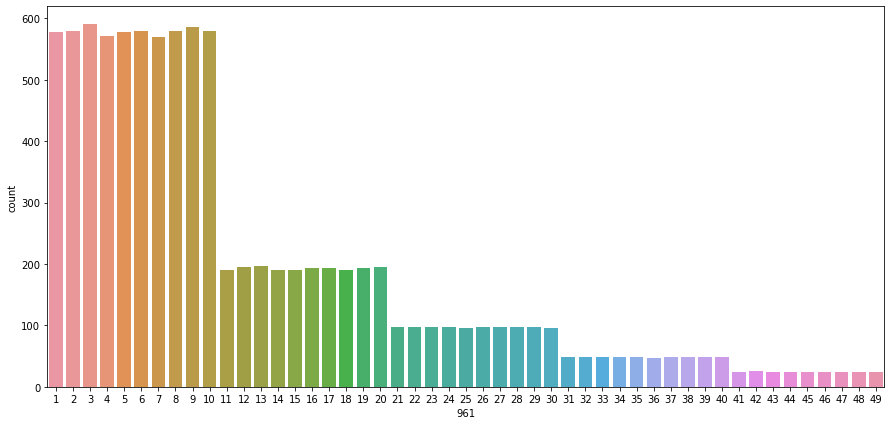

In [6]:
# plot the respective classes
f = plt.figure(figsize=(15,7))
g = sns.countplot(df.iloc[:,960])
plt.show()

In [7]:
# check for null values
df.isnull().sum()

1      0
2      0
3      0
4      0
5      0
      ..
957    0
958    0
959    0
960    0
961    0
Length: 961, dtype: int64

In [8]:

# df = df.sample(frac = 1)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Stratified Train test split
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=None)
for train_index, test_index in sss.split(X, y):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    X_train = X_train.values
    X_test = X_test.values
    y_train = y_train.values
    y_test = y_test.values

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# submission_test = scaler.transform(submission_test)

# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# X_test = test_df.iloc[:,:-1]
# y_test = test_df.iloc[:,-1]
print("X_train shape:", X_train.shape, "| y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "| y_test shape:", y_test.shape)

X_train shape: (7510, 960) | y_train shape: (7510,)
X_test shape: (1878, 960) | y_test shape: (1878,)


# Resampling Technique

We will use random undersampling, random oversampling, Tomek Links (Undersampling), and SMOTE for the first half of this experiment.

In [9]:
"""
1. Random Undersampling
"""
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

# fit predictor and target varialbe
x_rus_train, y_rus_train = rus.fit_resample(X_train, y_train)

print('original dataset shape:', Counter(y_train))
print('Resample dataset shape', Counter(y_rus_train))

original dataset shape: Counter({3: 472, 9: 469, 8: 464, 6: 464, 2: 463, 10: 463, 5: 462, 1: 462, 4: 457, 7: 456, 13: 157, 20: 156, 12: 156, 16: 155, 17: 154, 19: 154, 11: 152, 14: 152, 18: 152, 15: 152, 24: 78, 28: 78, 21: 78, 26: 78, 27: 78, 23: 78, 22: 78, 29: 78, 25: 77, 30: 76, 31: 39, 35: 39, 40: 39, 34: 39, 37: 39, 32: 39, 38: 39, 39: 39, 33: 39, 36: 38, 42: 20, 41: 19, 44: 19, 49: 19, 48: 19, 43: 19, 46: 19, 47: 19, 45: 19})
Resample dataset shape Counter({1: 19, 2: 19, 3: 19, 4: 19, 5: 19, 6: 19, 7: 19, 8: 19, 9: 19, 10: 19, 11: 19, 12: 19, 13: 19, 14: 19, 15: 19, 16: 19, 17: 19, 18: 19, 19: 19, 20: 19, 21: 19, 22: 19, 23: 19, 24: 19, 25: 19, 26: 19, 27: 19, 28: 19, 29: 19, 30: 19, 31: 19, 32: 19, 33: 19, 34: 19, 35: 19, 36: 19, 37: 19, 38: 19, 39: 19, 40: 19, 41: 19, 42: 19, 43: 19, 44: 19, 45: 19, 46: 19, 47: 19, 48: 19, 49: 19})


In [10]:
"""
2. Random Oversampling
"""
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
x_ros_train, y_ros_train = ros.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros_train))

Original dataset shape Counter({3: 472, 9: 469, 8: 464, 6: 464, 2: 463, 10: 463, 5: 462, 1: 462, 4: 457, 7: 456, 13: 157, 20: 156, 12: 156, 16: 155, 17: 154, 19: 154, 11: 152, 14: 152, 18: 152, 15: 152, 24: 78, 28: 78, 21: 78, 26: 78, 27: 78, 23: 78, 22: 78, 29: 78, 25: 77, 30: 76, 31: 39, 35: 39, 40: 39, 34: 39, 37: 39, 32: 39, 38: 39, 39: 39, 33: 39, 36: 38, 42: 20, 41: 19, 44: 19, 49: 19, 48: 19, 43: 19, 46: 19, 47: 19, 45: 19})
Resample dataset shape Counter({5: 472, 11: 472, 31: 472, 3: 472, 4: 472, 9: 472, 2: 472, 16: 472, 25: 472, 41: 472, 7: 472, 14: 472, 10: 472, 1: 472, 17: 472, 24: 472, 8: 472, 28: 472, 21: 472, 35: 472, 40: 472, 20: 472, 6: 472, 18: 472, 12: 472, 26: 472, 19: 472, 34: 472, 15: 472, 13: 472, 30: 472, 37: 472, 32: 472, 27: 472, 42: 472, 23: 472, 44: 472, 22: 472, 38: 472, 49: 472, 36: 472, 48: 472, 29: 472, 39: 472, 43: 472, 46: 472, 33: 472, 47: 472, 45: 472})


In [36]:
"""
3. Tomek Links Undersampling
Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair 
increases the space between the two classes, facilitating the classification process.
Tomek’s link exists if the two samples are the nearest neighbors of each other.
We’ll use ratio='majority' to resample the majority class.
"""
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()

# fit predictor and target variable
x_tl_train, y_tl_train = tl.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resample dataset shape:', Counter(y_tl_train))

Original dataset shape: Counter({3: 472, 9: 469, 8: 464, 6: 464, 2: 463, 10: 463, 5: 462, 1: 462, 4: 457, 7: 456, 13: 157, 20: 156, 12: 156, 16: 155, 17: 154, 19: 154, 11: 152, 14: 152, 18: 152, 15: 152, 24: 78, 28: 78, 21: 78, 26: 78, 27: 78, 23: 78, 22: 78, 29: 78, 25: 77, 30: 76, 31: 39, 35: 39, 40: 39, 34: 39, 37: 39, 32: 39, 38: 39, 39: 39, 33: 39, 36: 38, 42: 20, 41: 19, 44: 19, 49: 19, 48: 19, 43: 19, 46: 19, 47: 19, 45: 19})
Resample dataset shape: Counter({3: 467, 2: 462, 5: 459, 6: 458, 9: 450, 1: 450, 10: 449, 8: 446, 4: 443, 7: 435, 20: 156, 11: 152, 17: 152, 15: 151, 12: 150, 13: 150, 16: 148, 19: 148, 14: 146, 18: 138, 26: 78, 27: 78, 29: 78, 21: 77, 23: 77, 22: 77, 25: 76, 24: 76, 28: 76, 30: 70, 40: 39, 31: 38, 35: 38, 37: 38, 38: 38, 36: 37, 33: 37, 32: 36, 39: 35, 34: 34, 42: 20, 41: 19, 49: 19, 45: 19, 48: 18, 43: 18, 46: 18, 44: 17, 47: 16})


In [35]:

"""
4. SMOTE (Synthetic Minority Oversampling Technique)
This technique generates synthetic data for the minority class. SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point 
from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced
"""
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

# fit predictor and target variable
x_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote_train))

Original dataset shape Counter({3: 472, 9: 469, 8: 464, 6: 464, 2: 463, 10: 463, 5: 462, 1: 462, 4: 457, 7: 456, 13: 157, 20: 156, 12: 156, 16: 155, 17: 154, 19: 154, 11: 152, 14: 152, 18: 152, 15: 152, 24: 78, 28: 78, 21: 78, 26: 78, 27: 78, 23: 78, 22: 78, 29: 78, 25: 77, 30: 76, 31: 39, 35: 39, 40: 39, 34: 39, 37: 39, 32: 39, 38: 39, 39: 39, 33: 39, 36: 38, 42: 20, 41: 19, 44: 19, 49: 19, 48: 19, 43: 19, 46: 19, 47: 19, 45: 19})
Resample dataset shape Counter({5: 472, 11: 472, 31: 472, 3: 472, 4: 472, 9: 472, 2: 472, 16: 472, 25: 472, 41: 472, 7: 472, 14: 472, 10: 472, 1: 472, 17: 472, 24: 472, 8: 472, 28: 472, 21: 472, 35: 472, 40: 472, 20: 472, 6: 472, 18: 472, 12: 472, 26: 472, 19: 472, 34: 472, 15: 472, 13: 472, 30: 472, 37: 472, 32: 472, 27: 472, 42: 472, 23: 472, 44: 472, 22: 472, 38: 472, 49: 472, 36: 472, 48: 472, 29: 472, 39: 472, 43: 472, 46: 472, 33: 472, 47: 472, 45: 472})


# Predictions

In [13]:
"""
1. Using baseline Random Forest Classifier on the original imbalanced dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)
rfc_predict_prob = rfc.predict_proba(X_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict_prob, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('Macro F1 score:',f1_score(y_test, rfc_predict, average='macro'))
print('Micro F1 score:',f1_score(y_test, rfc_predict, average='micro'))

ROCAUC score: 0.8109104460511337
Accuracy score: 0.43769968051118213
Macro F1 score: 0.23935440639071012
Micro F1 score: 0.43769968051118213


In [14]:
"""
3. Using baseline Random Forest Classifier on the random oversampled dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_ros_train, y_ros_train)

# predict
rfc_predict_ros = rfc.predict(X_test)
rfc_predict_prob_ros = rfc.predict_proba(X_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict_prob_ros, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_test, rfc_predict_ros))
print('Macro F1 score:',f1_score(y_test, rfc_predict_ros, average='macro'))
print('Micro F1 score:',f1_score(y_test, rfc_predict_ros, average='micro'))

ROCAUC score: 0.8028776387284278
Accuracy score: 0.4179978700745474
Macro F1 score: 0.2763244926574604
Micro F1 score: 0.4179978700745474


In [15]:
"""
4. Using baseline Random Forest Classifier on the Tomek Linked dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_tl_train, y_tl_train)

# predict
rfc_predict_tl = rfc.predict(X_test)
rfc_predict_prob_tl = rfc.predict_proba(X_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict_prob_tl, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_test, rfc_predict_tl))
print('Macro F1 score:',f1_score(y_test, rfc_predict_tl, average='macro'))
print('Micro F1 score:',f1_score(y_test, rfc_predict_tl, average='micro'))

ROCAUC score: 0.8071503422477769
Accuracy score: 0.43769968051118213
Macro F1 score: 0.2405340748387395
Micro F1 score: 0.43769968051118213


In [16]:
"""
5. Using baseline Random Forest Classifier on the SMOTE resampled dataset
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_smote_train, y_smote_train)

# predict
rfc_predict_sm = rfc.predict(X_test)
rfc_predict_prob_sm = rfc.predict_proba(X_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_test, rfc_predict_prob_sm, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_test, rfc_predict_sm))
print('Macro F1 score:',f1_score(y_test, rfc_predict_sm, average='macro'))
print('Micro F1 score:',f1_score(y_test, rfc_predict_sm, average='micro'))

ROCAUC score: 0.7983492907077527
Accuracy score: 0.4329073482428115
Macro F1 score: 0.235660141634566
Micro F1 score: 0.4329073482428115


In [17]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(x_smote_train, y_smote_train)

svc_predict = svc_model.predict(X_test)
svc_predict_prob = svc_model.predict_proba(X_test)

# check performance

print('ROCAUC score:',roc_auc_score(y_test, svc_predict_prob, multi_class='ovr'))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('Macro F1 score:',f1_score(y_test, rfc_predict, average='macro'))
print('Micro F1 score:',f1_score(y_test, rfc_predict, average='micro'))

ROCAUC score: 0.8165056386505596
Accuracy score: 0.3248136315228967
Macro F1 score: 0.23935440639071012
Micro F1 score: 0.43769968051118213


Thus, it was observed that the random oversampling and SMOTE method produced the best results for the given class-imbalanced dataset. We will now apply these methods on the submission test set.

In [18]:
"""
1. Performing baseline Random Forest Classifier on the random oversampled dataset, without train_test_split.
Then generate predictions for the submission test set
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

X_ros, y_ros = ros.fit_resample(X,y)
# fit the predictor and target
rfc.fit(X_ros, y_ros)

# predict
rfc_predict = rfc.predict(submission_test)
rfc_predict_prob = rfc.predict_proba(submission_test)


In [19]:
import os

outname = 'RFC_ROS_output.csv'

outdir = './submission'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    

Id = [i for i in range (0, 2959)]
predict = pd.DataFrame(Id, columns = ['Id'])
predict['Category'] = rfc_predict
print(predict)
predict.to_csv(fullname, index=False)

        Id  Category
0        0         1
1        1        11
2        2        13
3        3        14
4        4        31
...    ...       ...
2954  2954         7
2955  2955         9
2956  2956         3
2957  2957         5
2958  2958        12

[2959 rows x 2 columns]


In [20]:
"""
2. Performing baseline Random Forest Classifier on the SMOTE resampled dataset, without train_test_split.
Then generate predictions for the submission test set
"""

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

X_smote, y_smote = smote.fit_resample(X,y)

# fit the predictor and target
rfc.fit(X_smote, y_smote)

# predict
rfc_predict = rfc.predict(submission_test)
rfc_predict_prob = rfc.predict_proba(submission_test)


In [21]:
import os

outname = 'RFC_SMOTE_output.csv'

outdir = './submission'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    

Id = [i for i in range (0, 2959)]
predict = pd.DataFrame(Id, columns = ['Id'])
predict['Category'] = rfc_predict
print(predict)
predict.to_csv(fullname, index=False)

        Id  Category
0        0         1
1        1        11
2        2         9
3        3         3
4        4         4
...    ...       ...
2954  2954         7
2955  2955         9
2956  2956         3
2957  2957         6
2958  2958         1

[2959 rows x 2 columns]


In [26]:
"""
3. Utilised xgboost on the SMOTE resampled dataset, without train_test_split.
Then generate predictions for the submission test set
"""
# fit the predictor and target
model = xgboost.XGBClassifier()
model.fit(X_smote, y_smote)

# predict
# X_test_scaled = scaler.transform(submission_test)
# y_predict = model.predict(X_test_scaled)
y_predict = model.predict(submission_test)
print(y_predict)

/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:38:32] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[ 1 11  9 ... 14 13 12]


In [27]:
import os

outname = 'XGBOOST_SMOTE_output.csv'

outdir = './submission'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)    

Id = [i for i in range (0, 2959)]
predict = pd.DataFrame(Id, columns = ['Id'])
predict['Category'] = rfc_predict
print(predict)
predict.to_csv(fullname, index=False)

        Id  Category
0        0         4
1        1        11
2        2         9
3        3         3
4        4         4
...    ...       ...
2954  2954         7
2955  2955         9
2956  2956         3
2957  2957        10
2958  2958         8

[2959 rows x 2 columns]


# Cross Validation

In [73]:
# # Logistic Regression 
# log_reg_params = {"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter':[1000]}

# grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
# grid_log_reg.fit(X_train, y_train)
# # We automatically get the logistic regression with the best parameters.
# log_reg = grid_log_reg.best_estimator_

# knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

# grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
# grid_knears.fit(X_train, y_train)
# # KNears best estimator
# knears_neighbors = grid_knears.best_estimator_

# # Support Vector Classifier
# svc_params = {'C': [x * 0.2 for x in range(0, 10)], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(SVC(probability=True), svc_params)
# grid_svc.fit(X_train, y_train)

# # SVC best estimator
# svc = grid_svc.best_estimator_

# # DecisionTree Classifier
# tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,10,1)), 
#               "min_samples_leaf": list(range(5,10,1))}
# grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
# grid_tree.fit(X_train, y_train)

# # tree best estimator
# tree_clf = grid_tree.best_estimator_



/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

NameError: name 'param_grid' is not defined

In [90]:
# # SVC best estimator
# svc = SVC(probability=True, C=0.8)
# svc.fit(X_train,y_train)

SVC(C=0.8, probability=True)

In [74]:
# # Random Forest Classifier
# forest_params = [
# {'n_estimators': [10, 25,50], 'max_features': [5, 10, 15, 20], 
#  'max_depth': [10, 30, 50, 100, None], 'bootstrap': [True, False]}
# ]

# grid_forest = GridSearchCV(RandomForestClassifier(), forest_params, cv=10, scoring='neg_mean_squared_error')
# grid_forest.fit(X_train, y_train)

# forest_clf = grid_forest.best_estimator_

In [79]:
# grid_log_reg.best_estimator_

LogisticRegression(C=1, max_iter=1000)

In [91]:
# from sklearn.metrics import roc_curve
# from sklearn.model_selection import cross_val_predict
# # Create a DataFrame with all the scores and the classifiers names.

# log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
#                              method="predict_proba")

# knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5, method="predict_proba")

# svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
#                              method="predict_proba")

# tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5, method="predict_proba")

# forest_pred = cross_val_predict(forest_clf, X_train, y_train, cv=5, method="predict_proba")

/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [94]:
# print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred, multi_class='ovr'))
# print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred, multi_class='ovr'))
# print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred, multi_class='ovr'))
# print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred, multi_class='ovr'))
# print('Random Forest Classifier:', roc_auc_score(y_train, forest_pred, multi_class='ovr'))

Logistic Regression:  0.7189530987483688
KNears Neighbors:  0.635502157179864
Support Vector Classifier:  0.7877399778608127
Decision Tree Classifier:  0.6869934801822807
Random Forest Classifier: 0.7841688083139524


In [22]:
forest_params = [
{'n_estimators': [100,1000], 'max_features': [20,50,100],
 'max_depth': [50,100]}
]

grid_forest_sm = GridSearchCV(RandomForestClassifier(), forest_params, cv=5, scoring='neg_mean_squared_error')

In [23]:
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# forest_sm = RandomForestClassifier(n_estimators=1000, max_features=20, max_depth=50)

# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in skf.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTE(random_state=42), grid_forest_sm) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = grid_forest_sm.best_estimator_
    prediction = best_est.predict(X_train[test])
    prediction_prob = best_est.predict_proba(X_train[test])
    
    accuracy_lst.append(accuracy_score(y_train[test], prediction))
    precision_lst.append(precision_score(y_train[test], prediction, average='macro'))
    recall_lst.append(recall_score(y_train[test], prediction, average='macro'))
    f1_lst.append(f1_score(y_train[test], prediction, average='macro'))
    auc_lst.append(roc_auc_score(y_train[test], prediction_prob, multi_class='ovr'))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/mlp/anaconda3/envs/SML/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KeyboardInterrupt: 

# SMOTE + Tomek Links (Oversample + Undersample)

In [102]:
from imblearn.combine import SMOTETomek
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in skf.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTETomek(), grid_forest_sm) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = grid_forest_sm.best_estimator_
    prediction = best_est.predict(X_train[test])
    prediction_prob = best_est.predict_proba(X_train[test])
    
    accuracy_lst.append(accuracy_score(y_train[test], prediction))
    precision_lst.append(precision_score(y_train[test], prediction, average='macro'))
    recall_lst.append(recall_score(y_train[test], prediction, average='macro'))
    f1_lst.append(f1_score(y_train[test], prediction, average='macro'))
    auc_lst.append(roc_auc_score(y_train[test], prediction_prob, multi_class='ovr'))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('ROCAUC score: {}'.format(np.mean(auc_lst)))
print('---' * 45)

[[ 8.4686e-01 -3.5742e-01 -3.0884e+00 ... -3.3138e-01 -3.1728e+00
  -6.2594e-01]
 [ 2.2068e+01 -1.7673e+01 -8.6546e+00 ...  1.4710e+00  5.2288e+00
  -5.0476e+00]
 [ 2.6134e+00  4.6899e-01 -2.4256e+00 ...  1.7655e+01  2.0509e+00
   8.2421e+00]
 ...
 [ 1.5151e-01 -6.7625e-02 -4.4411e-01 ... -5.4223e+00 -1.5820e+00
   2.2043e-01]
 [-3.3042e+00 -1.6173e+00 -1.6581e+00 ...  5.2895e+01 -1.0407e+01
   2.0062e+02]
 [ 6.4606e-01 -1.3100e-01 -2.6313e-01 ...  3.0744e+01 -5.4991e+01
   6.2445e+01]]


# SMOTE + ENN (Oversample + Undersample)

In [ ]:
from imblearn.combine import SMOTEENN
# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

forest_params = [
{'n_estimators': 50, 'max_features': 20, 
 'max_depth': 50}
]

# grid_forest_sm = GridSearchCV(RandomForestClassifier(), forest_params, cv=5, scoring='neg_mean_squared_error')

# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

# Implementing SMOTE Technique 
# Cross Validating the right way
for train, test in skf.split(X_train, y_train):
    pipeline = imbalanced_make_pipeline(SMOTEENN()(), grid_forest_sm) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = grid_forest_sm.best_estimator_
    prediction = best_est.predict(X_train[test])
    prediction_prob = best_est.predict_proba(X_train[test])
    
    accuracy_lst.append(accuracy_score(y_train[test], prediction))
    precision_lst.append(precision_score(y_train[test], prediction, average='macro'))
    recall_lst.append(recall_score(y_train[test], prediction, average='macro'))
    f1_lst.append(f1_score(y_train[test], prediction, average='macro'))
    auc_lst.append(roc_auc_score(y_train[test], prediction_prob, multi_class='ovr'))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('ROCAUC score: {}'.format(np.mean(auc_lst)))
print('---' * 45)